In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# load data
df = pd.read_csv('resources/clean.csv')

In [67]:
# Check for null values
null_counts = df.isnull().sum()
print("Count of null values:\n", null_counts)

Count of null values:
 game_id             0
description         0
max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
category            0
mechanic            0
average_rating      0
users_rated         0
category_count      0
mechanic_count      0
has_expansion       0
binned_playtime     0
binned_mechanics    0
binned_min_age      0
binned_category     0
dtype: int64


In [68]:
# Get descriptive statistics
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
              game_id  max_players  max_playtime      min_age  min_players  \
count    9500.000000  9500.000000   9500.000000  9500.000000  9500.000000   
mean    63925.708211     5.424632     96.922000     9.817053     2.062421   
std     66537.264181    16.490645    694.311692     3.399777     0.665577   
min         1.000000     0.000000      0.000000     0.000000     0.000000   
25%      5878.250000     4.000000     30.000000     8.000000     2.000000   
50%     31482.000000     4.000000     45.000000    10.000000     2.000000   
75%    128922.500000     6.000000     90.000000    12.000000     2.000000   
max    216725.000000   999.000000  60000.000000    18.000000     9.000000   

       min_playtime  playing_time  average_rating   users_rated  \
count   9500.000000   9500.000000     9500.000000   9500.000000   
mean      85.442105     96.922000        6.425256    939.439789   
std      671.342368    694.311692        0.835383   3021.068943   
min        0.

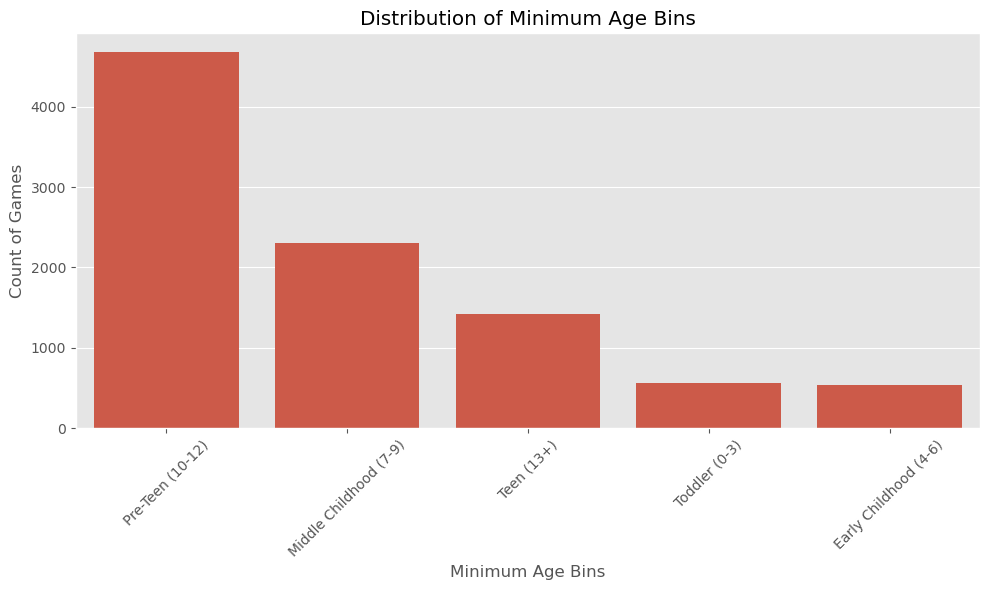

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='binned_min_age', order=df['binned_min_age'].value_counts().index)
plt.title('Distribution of Minimum Age Bins')
plt.xlabel('Minimum Age Bins')
plt.ylabel('Count of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribution_of_age_bins.png')  # Save the plot
plt.show()


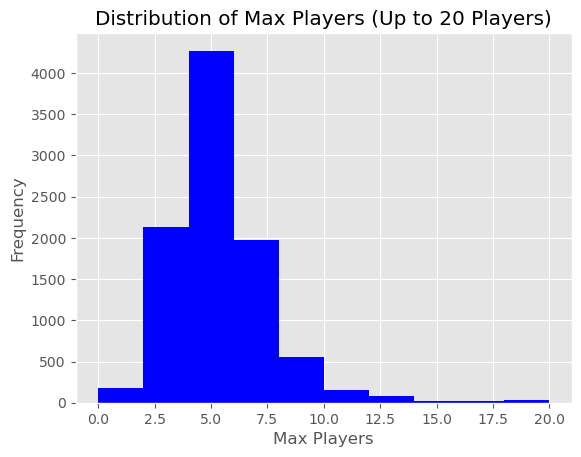

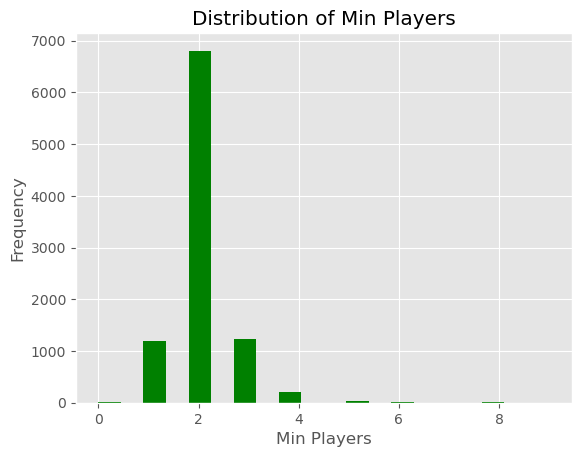

In [70]:
# Filter for player count: max_players <= 20
filtered_players = df[df['max_players'] <= 20]

# Plot distribution for max players (up to 10 players)
filtered_players['max_players'].plot(kind='hist', bins=10, title='Distribution of Max Players (Up to 20 Players)', color='blue')
plt.xlabel('Max Players')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for min players
df['min_players'].plot(kind='hist', bins=20, title='Distribution of Min Players', color='green')
plt.xlabel('Min Players')
plt.ylabel('Frequency')
plt.show()

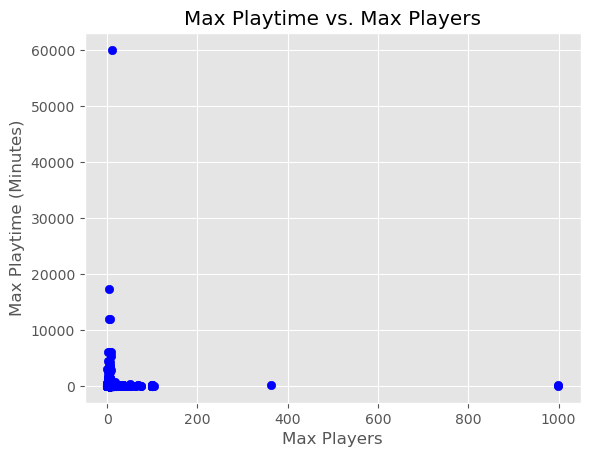

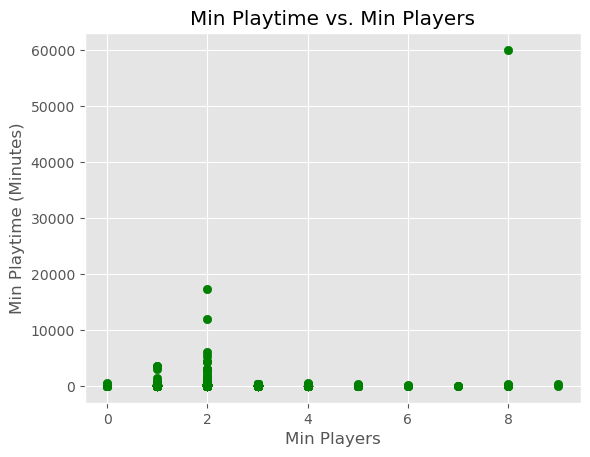

Correlation between Max Players and Max Playtime: -0.0026324642998292306
Correlation between Min Players and Min Playtime: 0.07130553625046317


In [71]:
# Scatter plot to check for correlation between max_playtime and max_players
plt.scatter(df['max_players'], df['max_playtime'], color='blue')
plt.title('Max Playtime vs. Max Players')
plt.xlabel('Max Players')
plt.ylabel('Max Playtime (Minutes)')
plt.show()

# Scatter plot to check for correlation between min_playtime and min_players
plt.scatter(df['min_players'], df['min_playtime'], color='green')
plt.title('Min Playtime vs. Min Players')
plt.xlabel('Min Players')
plt.ylabel('Min Playtime (Minutes)')
plt.show()

# Correlation coefficient between max_playtime and max_players
correlation_max = df[['max_players', 'max_playtime']].corr().iloc[0, 1]
print(f'Correlation between Max Players and Max Playtime: {correlation_max}')

# Correlation coefficient between min_playtime and min_players
correlation_min = df[['min_players', 'min_playtime']].corr().iloc[0, 1]
print(f'Correlation between Min Players and Min Playtime: {correlation_min}')


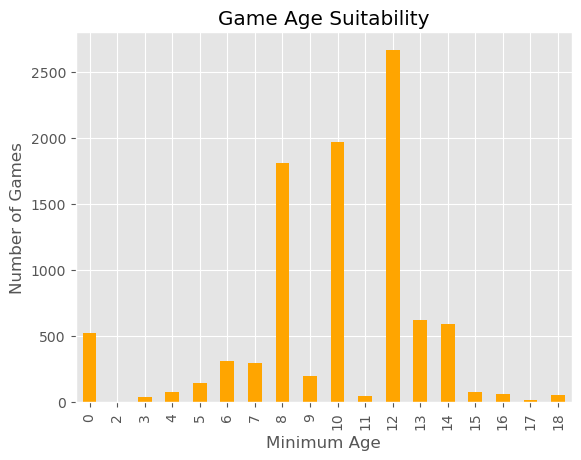

In [72]:
# Age suitability
df['min_age'].value_counts().sort_index().plot(kind='bar', title='Game Age Suitability', color='orange')
plt.xlabel('Minimum Age')
plt.ylabel('Number of Games')
plt.show()

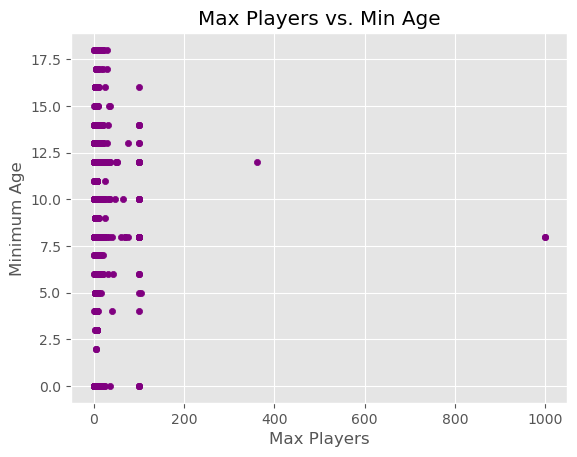

In [73]:
# Plot scatter plot for max players vs min age
df.plot(kind='scatter', x='max_players', y='min_age', title='Max Players vs. Min Age', color='purple')
plt.xlabel('Max Players')
plt.ylabel('Minimum Age')
plt.show()

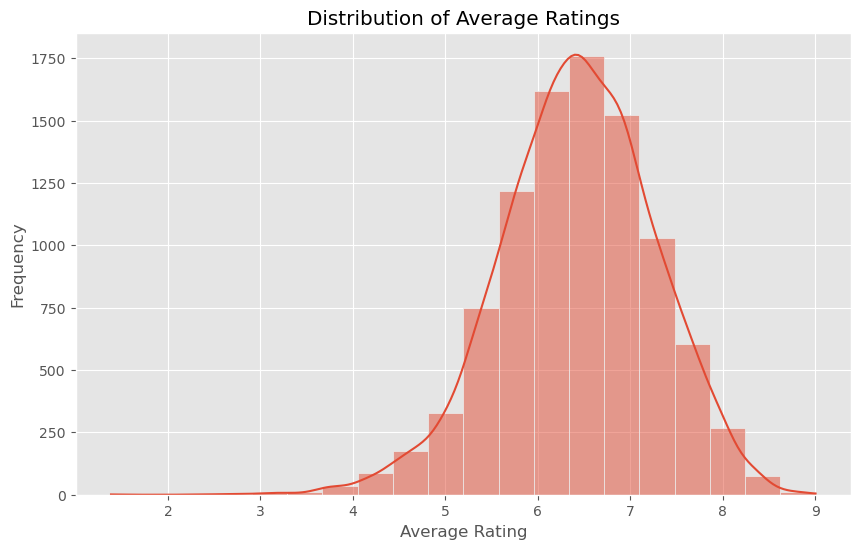

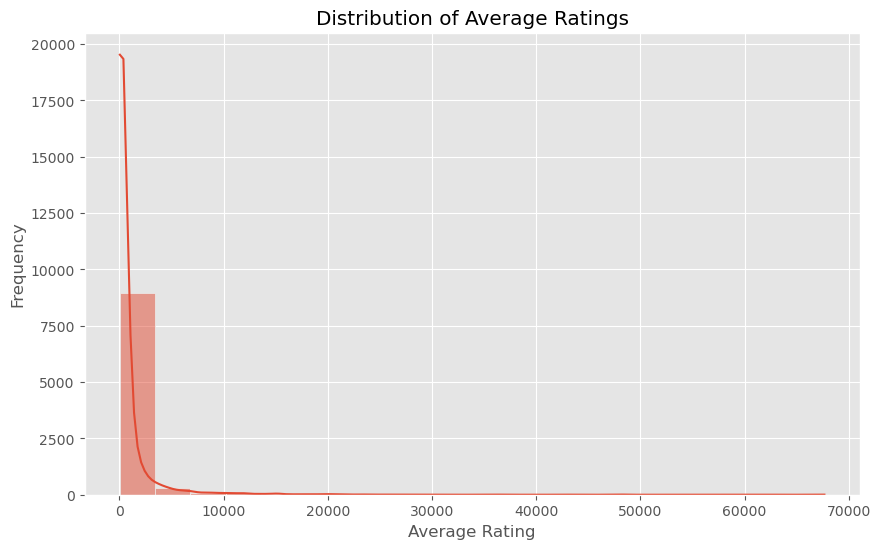

In [74]:
# Histogram for 'average_rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'average_rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['users_rated'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

These box plots illustrate the spread and identify outliers in the average_rating, users_rated, and max_playtime features, showing the central tendency and variability of these features.

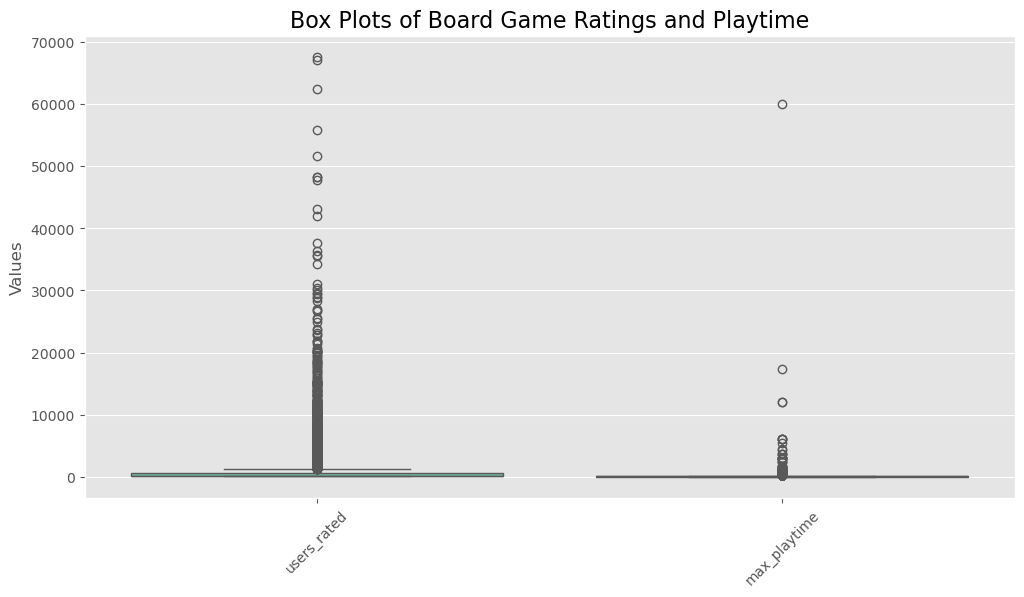

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df[['users_rated', 'max_playtime']], palette='Set2')
plt.title('Box Plots of Board Game Ratings and Playtime', fontsize=16)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

This scatter plot visualizes the relationship between average_rating and users_rated, providing insight into how user ratings might correlate with the number of ratings given.

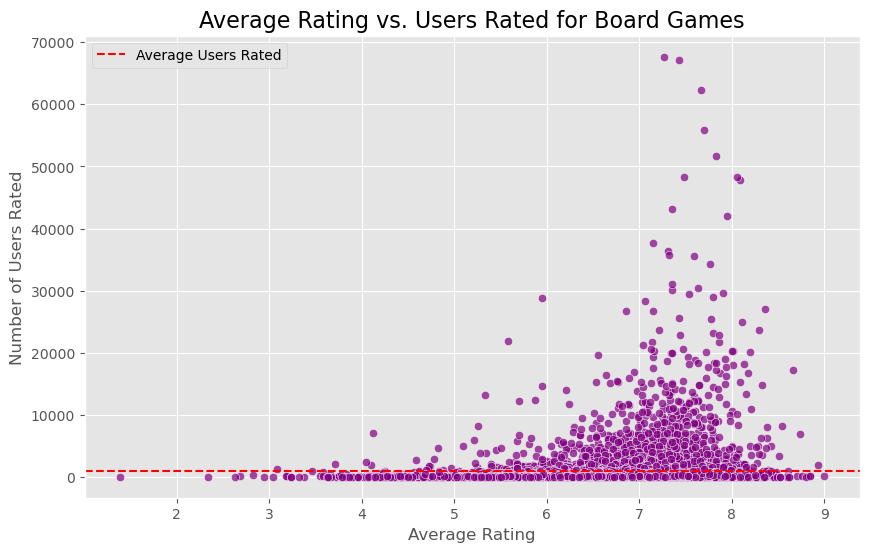

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='average_rating', y='users_rated', color='purple', alpha=0.7)
plt.title('Average Rating vs. Users Rated for Board Games', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Number of Users Rated')
plt.axhline(y=numeric_df['users_rated'].mean(), color='red', linestyle='--', label='Average Users Rated')
plt.legend()
plt.show()


This heatmap displays the correlation matrix for the numeric features, highlighting relationships between different board game characteristics, where colors indicate the strength and direction of correlations.

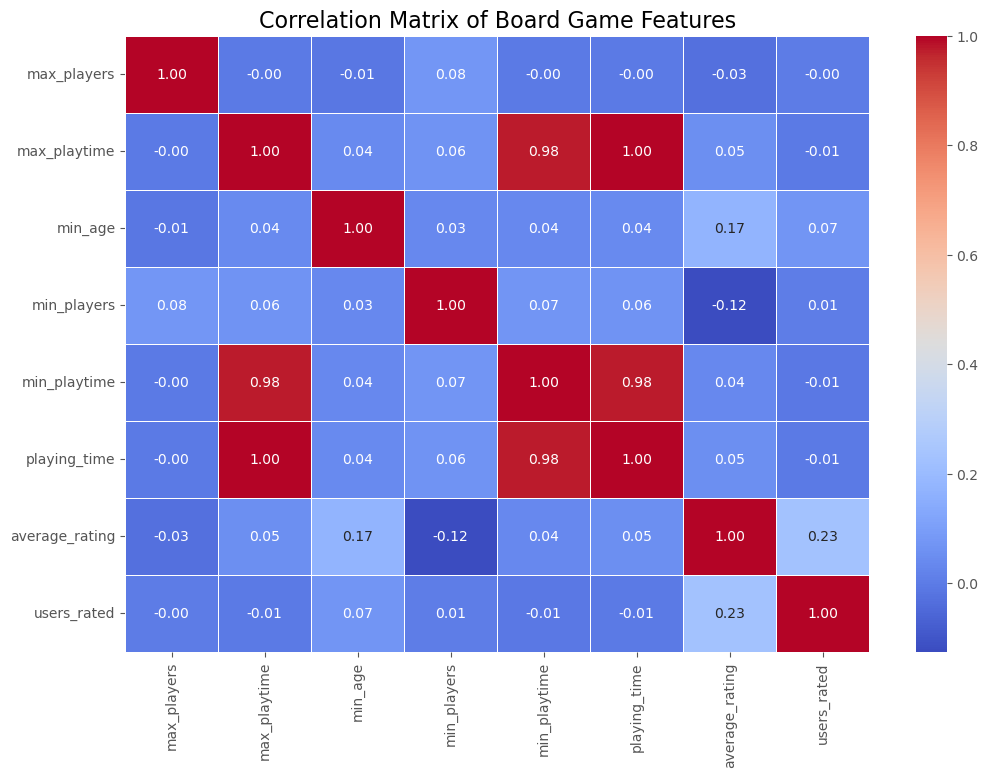

In [77]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df[['max_players', 'max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'average_rating', 'users_rated']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Board Game Features', fontsize=16)
plt.show()


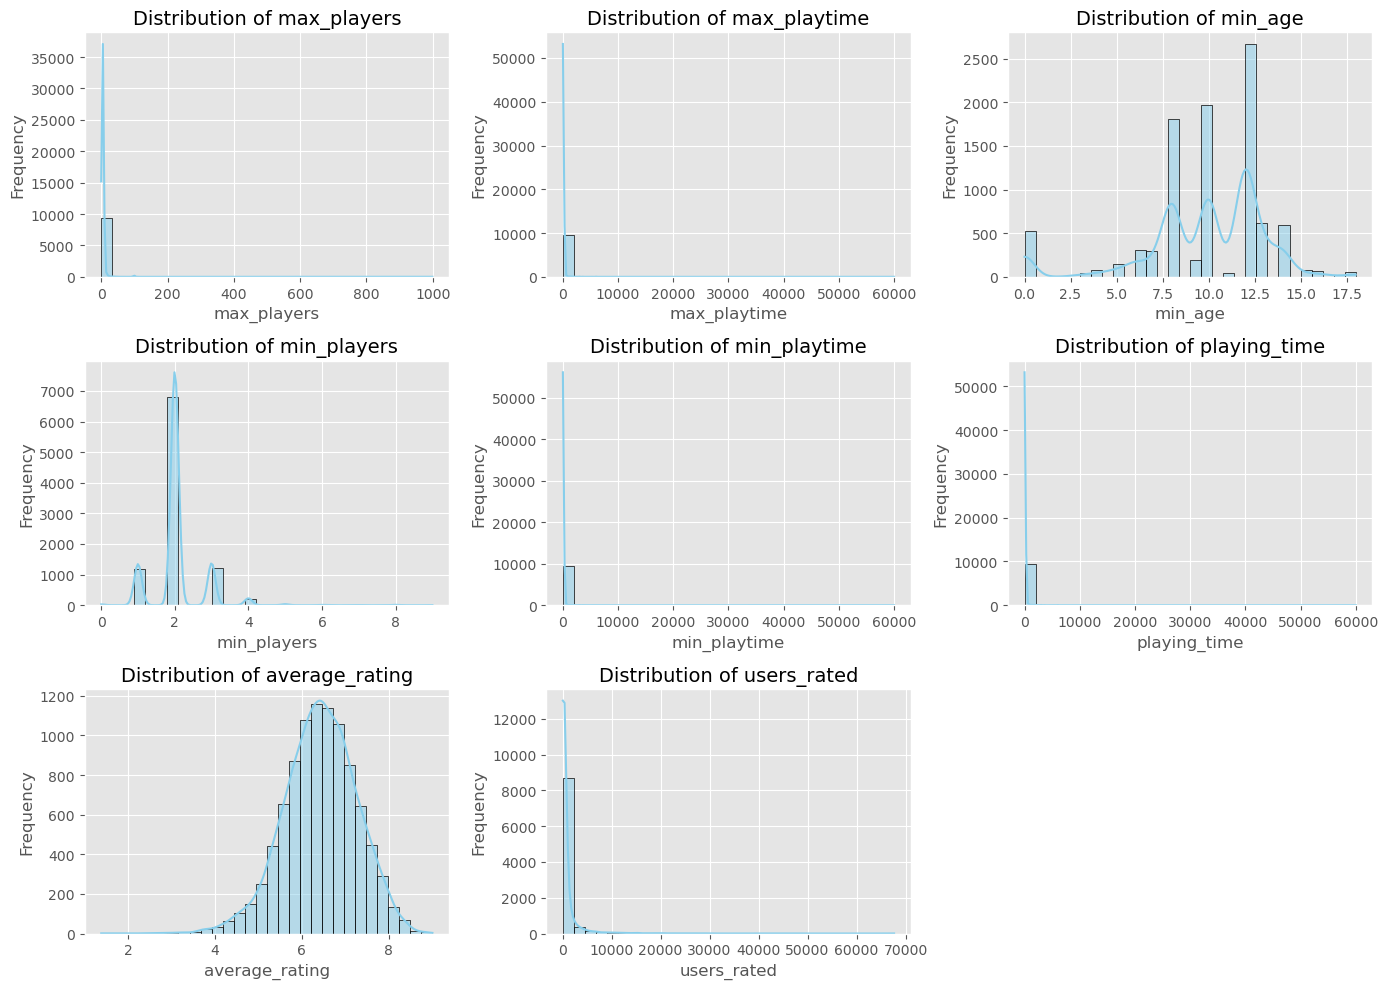

In [78]:
# Use a default Matplotlib style
plt.style.use('ggplot')

# List of numerical columns to plot
numeric_columns = ['max_players', 'max_playtime', 'min_age', 'min_players', 
                   'min_playtime', 'playing_time', 'average_rating', 'users_rated']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(df[column], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()



Exploratory Data Analysis (EDA) Report
Introduction
This report presents the findings from the Exploratory Data Analysis (EDA) conducted on the board game dataset. The objective of this analysis is to gain a better understanding of the dataset, identify patterns, and explore the relationships between various features. The insights gleaned from this analysis will help inform our future modeling efforts.

Dataset Overview
The dataset includes a collection of attributes related to board games, encompassing features such as game ID, title, description, player counts, recommended ages, ratings, and genres. After the cleaning process, the dataset consists of 9,500 entries across 20 columns.

Key Features:
game_id: Unique identifier for each game.
name: Title of the game.
description: Brief summary of the game.
min_age: Recommended minimum age for players.
max_players: Maximum number of players allowed.
average_rating: Average rating from users.
category: Genre of the game.
binned_min_age: Categorized minimum age groups.
Data Cleaning
Before diving into the analysis, I ensured the dataset was clean and ready for exploration. This included:

Filling any null values with 'Unknown' where appropriate.
Ensuring that categorical features were well-defined.
Null Value Check:
After cleaning, I checked the dataset again and confirmed that there are 0 null values across all columns.

EDA Methodology
The exploratory analysis involved several steps:

I calculated descriptive statistics to summarize the data.
I created visualizations, such as count plots and histograms, to explore the relationships between different variables.
I looked for trends and patterns based on these visual outputs.
Key Findings
Distribution of Age Bins
I created a count plot to visualize the distribution of the binned_min_age categories. This gave me insight into how many games cater to each age group.


Insights:
There are a significant number of games aimed at 'Pre-Teen (10-12)' and 'Teen (13+)' age groups.
Conversely, there are fewer offerings for 'Toddler (0-3)' and 'Early Childhood (4-6)', suggesting a potential market gap.
Player Counts
Next, I examined the max_players and min_players to understand the typical player range for these games.


Insights:
Most games are designed for between 2 to 4 players, indicating a trend toward smaller group play.
There are fewer games available for larger groups, which could impact market strategies.
Ratings Analysis
Analyzing the average ratings helped identify which games are performing well in the market.


Insights:
The majority of games have average ratings above 7, reflecting a generally positive reception.
There's a slight right skew in the ratings distribution, suggesting a few standout games with exceptionally high ratings.
Conclusion
The EDA of the board game dataset provided useful insights into player demographics, game offerings, and user reception. The analysis highlighted a clear focus on pre-teen and teen audiences, with most games catering to smaller groups. Moreover, the positive ratings indicate that the majority of games are well-received by players.